# 1. Качественная результирующая переменная, количественный фактор. Количественная результирующая переменная, качественный фактор


## 1.1 t-тест Стьюдента

### 1.1.1 Two-Sample T-Test (независимый, двухвыборочный t-тест Стьюдента)

In [1]:
# импорт библиотек
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [2]:
#считываем данные
df4 = pd.read_excel(r"C:\Users\Goba-PC\Desktop\python\obrabotka\Coca-Cola_stock_history_k_averege_fill.xlsx")
del df4['Unnamed: 0']
df4

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,isRising
0,52.611363,52.960361,50.439822,51.147511,25611100,0.0,0,2021-01-04,0
1,50.730656,51.492006,50.439822,50.585239,20323800,0.0,0,2021-01-05,0
2,50.381660,50.430131,48.656059,48.975975,38724500,0.0,0,2021-01-06,0
3,48.559114,48.723917,48.006535,48.433086,53225700,0.0,0,2021-01-07,1
4,48.500948,49.567331,48.316756,49.518860,29674000,0.0,0,2021-01-08,0
...,...,...,...,...,...,...,...,...,...
264,61.000000,61.439999,60.720001,60.750000,23002400,0.0,0,2022-01-20,0
265,61.080002,61.299999,60.400002,60.450001,26641500,0.0,0,2022-01-21,0
266,59.900002,60.349998,58.570000,59.959999,30207500,0.0,0,2022-01-24,0
267,59.360001,60.049999,58.689999,59.820000,19027100,0.0,0,2022-01-25,0


In [7]:
#разделяем выборки по целевому критерию
df4_1 = df4[df4['isRising'] == 1]
df4_0 = df4[df4['isRising'] == 0]

In [8]:
df4_1 

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,isRising
3,48.559114,48.723917,48.006535,48.433086,53225700,0.0,0,2021-01-07,1
6,48.510642,48.830555,48.239197,48.578503,24159800,0.0,0,2021-01-12,1
10,47.250379,47.541209,46.765660,47.027405,29114500,0.0,0,2021-01-19,1
11,51.199376,47.327932,46.833520,47.192211,23115800,0.0,0,2021-01-20,1
13,47.318234,47.444258,47.008015,47.008015,15400300,0.0,0,2021-01-22,1
...,...,...,...,...,...,...,...,...,...
257,60.549999,60.820000,60.180000,60.430000,20954300,0.0,0,2022-01-10,1
258,60.430000,60.490002,59.840000,60.450001,19369600,0.0,0,2022-01-11,1
259,60.529999,60.689999,60.189999,60.540001,15753800,0.0,0,2022-01-12,1
260,60.540001,61.040001,60.389999,60.900002,14318000,0.0,0,2022-01-13,1


In [9]:
# выводим средний Объём продаж в каждой выборке
print(df4_1['Volume'].mean(), df4_0['Volume'].mean())

16075680.381944444 16062123.4


In [10]:
#осуществляем Two-Sample T-Test
stats.ttest_ind(a= df4_1['Volume'], b= df4_0['Volume'], equal_var=False)

Ttest_indResult(statistic=0.014830351002760657, pvalue=0.9881789910365597)

Согласно полученному значению P, средние значения дохода у рассматриваемых групп клиентов статистически значимо различаются. Это вероятность получить такие или более выраженные различия при условии, что в генеральной совокупности никаких различий на самом деле нет. 

 (https://habr.com/company/stepic/blog/250527/)

### 1.1.2 Paired T-Test (для связных выборок t-тест Стьюдента)

Данный тест служит для проверки эффективности какого-то мероприятия (например, показателей времени решения задачи ОДНИХ И ТЕХ ЖЕ программистов ПОСЛЕ обучения)

In [49]:
np.random.seed(11)

before= stats.norm.rvs(scale=3, loc=20, size=100)

after = before + stats.norm.rvs(scale=3, loc=-5, size=100)

weight_df = pd.DataFrame({"weight_before":before,
                          "weight_after":after,
                          "weight_change":after-before})

weight_df.describe()             

,weight_before,weight_after,weight_change
count,100.000000,100.000000,100.000000
mean,20.034555,15.046330,-4.988225
std,2.813254,3.970184,2.870218
min,12.040044,5.098136,-11.147172
25%,18.042104,12.734795,-6.677726
50%,20.083081,14.686234,-5.098078
75%,22.063715,17.703463,-3.206796
max,26.470023,25.145545,1.605569


Резюме показывает, что программисты выиграли около 4,988 часа в среднем после обучения для решения задачи. Проведем парный t-тест, чтобы увидеть, является ли эта разница существенной с 95% -ным доверительным уровнем:

In [8]:
stats.ttest_rel(a = before, b = after)

Ttest_relResult(statistic=17.379257598363345, pvalue=7.752039383109762e-32)

Значение p  в тестовом выходе показывает, что шансы увидеть полученную или еще большую разницу  между выборками из-за случайности составляют менее 0.01.

## 1.2. U-критерий Манна — Уитни. Тест Крускала-Уоллиса.  Тест Колмогорова-Смирнова

t-тест Стьюдента использует средние арифметические значения, что приводит к его неустойчивости при наличии аномальных выбросов и формы распределения, отличающейся от нормальной.

В такой ситуации прибегают к использованию U-критерия Манна-Уитни. 
Он относится к непараметрическим критериям

### критерий Манна — Уитни

In [11]:
stats.mannwhitneyu(x= df4_1['Volume'], y= df4_0['Volume'])

MannwhitneyuResult(statistic=9415.0, pvalue=0.5148374151711994)

### Крускала Уоллис тест (для нескольких групп)

In [21]:
df4['N'] = pd.qcut(df4.Volume, 4)
groups = {}
for grp in df4['N'].unique():
    groups[grp] = df4['High'][df4['N']==grp]
print(groups)



{Interval(18026300.0, 67845700.0, closed='right'): 0      52.960361
1      51.492006
2      50.430131
3      48.723917
4      49.567331
         ...    
264    61.439999
265    61.299999
266    60.349998
267    60.049999
268    60.349998
Name: High, Length: 67, dtype: float64, Interval(14318000.0, 18026300.0, closed='right'): 13     47.444258
14     47.347318
17     47.987148
24     48.636669
25     48.491254
         ...    
231    53.340000
235    55.349998
244    57.970001
255    61.119999
259    60.689999
Name: High, Length: 67, dtype: float64, Interval(11727000.0, 14318000.0, closed='right'): 15     47.890208
19     47.201899
20     47.841734
21     47.589677
23     48.258585
         ...    
236    55.130001
245    58.189999
248    58.939999
256    60.720001
260    61.040001
Name: High, Length: 67, dtype: float64, Interval(6169199.999, 11727000.0, closed='right'): 64     52.296592
65     52.179290
66     52.081537
67     52.345465
68     52.091315
         ...    
246    58.61000

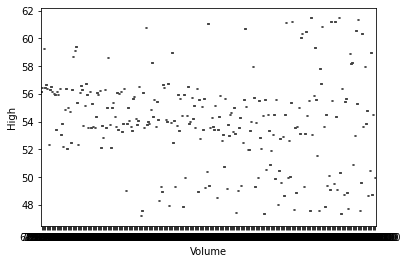

In [22]:
sns.boxplot(y="High", x='Volume', data=df4);

In [37]:
df4['N'].unique()[1]

Interval(14318000.0, 18026300.0, closed='right')

In [41]:
args = groups.values()
stats.kruskal(*args)

KruskalResult(statistic=23.987601515486972, pvalue=2.5129305706455663e-05)

In [155]:
#stats.kruskal(df4['Опыт работы'][df4.Иждивенцы==0],
              #df4['Опыт работы'][df4.Иждивенцы==1], 
              #df4['Опыт работы'][df4.Иждивенцы==2],
              #df4['Опыт работы'][df4.Иждивенцы==3], 
             # df4['Опыт работы'][df4.Иждивенцы==4])

KruskalResult(statistic=0.3355168136319256, pvalue=0.9874075693119144)

### Тест Колмогорова-Смирнова

In [26]:
stats.ks_2samp(df4_1['Volume'],df4_0['Volume'])

KstestResult(statistic=0.09472222222222222, pvalue=0.543256728332322)

<AxesSubplot:xlabel='High', ylabel='Density'>

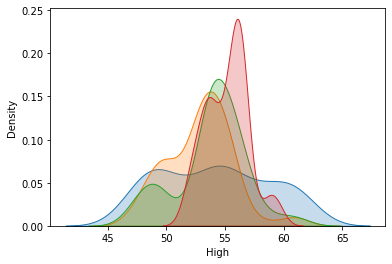

In [39]:
sns.kdeplot(df4['High'][df4.N==df4['N'].unique()[0]], label='0', shade=True)
sns.kdeplot(df4['High'][df4.N==df4['N'].unique()[1]], label='1', shade=True)
sns.kdeplot(df4['High'][df4.N==df4['N'].unique()[2]], label='2', shade=True)
sns.kdeplot(df4['High'][df4.N==df4['N'].unique()[3]], label='3', shade=True)
#sns.kdeplot(df4['High'][df4.Иждивенцы==4], label='4', shade=True)


In [42]:
stats.ks_2samp(groups[2],groups[3])

KeyError: 2

# 2. Количественная результирующая переменная, количественный фактор

## 2.1 Ковариация

Есть много путей посчитать ковариацию - первый, самый простой - это использовать функцию Pandas .cov()

In [43]:
df4.mean()

C:\Users\Goba-PC\AppData\Local\Temp/ipykernel_19616/1527584861.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df4.mean()


Open            5.364252e+01
High            5.398908e+01
Low             5.330804e+01
Close           5.365289e+01
Volume          1.606938e+07
Dividends       6.245353e-03
Stock Splits    0.000000e+00
isRising        5.353160e-01
dtype: float64

In [44]:
df4.cov()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,isRising
Open,1.045589e+01,1.044713e+01,1.038674e+01,1.032209e+01,-2.923480e+06,-0.001851,0.0,-0.029842
High,1.044713e+01,1.071134e+01,1.060053e+01,1.058037e+01,-2.662385e+06,-0.003714,0.0,-0.032058
Low,1.038674e+01,1.060053e+01,1.066865e+01,1.052932e+01,-3.885355e+06,-0.003501,0.0,-0.032200
Close,1.032209e+01,1.058037e+01,1.052932e+01,1.069245e+01,-3.561919e+06,-0.004644,0.0,-0.058756
Volume,-2.923480e+06,-2.662385e+06,-3.885355e+06,-3.561919e+06,5.534792e+13,11653.397298,0.0,3384.920310
Dividends,-1.850545e-03,-3.713949e-03,-3.500832e-03,-4.643909e-03,1.165340e+04,0.002594,0.0,-0.000221
Stock Splits,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
isRising,-2.984194e-02,-3.205842e-02,-3.220022e-02,-5.875640e-02,3.384920e+03,-0.000221,0.0,0.249681


## 2.2 Корреляция

In [45]:
#pandas
df4.corr()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,isRising
Open,1.000000,0.987176,0.983432,0.976222,-0.121526,-0.011237,NaN,-0.018469
High,0.987176,1.000000,0.991633,0.988645,-0.109345,-0.022282,NaN,-0.019603
Low,0.983432,0.991633,1.000000,0.985841,-0.159892,-0.021045,NaN,-0.019729
Close,0.976222,0.988645,0.985841,1.000000,-0.146418,-0.027886,NaN,-0.035960
Volume,-0.121526,-0.109345,-0.159892,-0.146418,1.000000,0.030757,NaN,0.000911
Dividends,-0.011237,-0.022282,-0.021045,-0.027886,0.030757,1.000000,NaN,-0.008700
Stock Splits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isRising,-0.018469,-0.019603,-0.019729,-0.035960,0.000911,-0.008700,NaN,1.000000


In [47]:
#scipy
stats.pearsonr(df4['Volume'], df4['High'])

(-0.10934482534881781, 0.07338816348406138)

### 2.2.1. Корреляция для случаев аномалий в данных 

В таких ситуациях прибегают к использованию 

1) Коэффициент Кендалла (Кендалл-тау)

2) Коэффициент корреляции Спирмена 



In [48]:
#pandas
df4.corr(method='kendall')

,Open,High,Low,Close,Volume,Dividends,Stock Splits,isRising
Open,1.000000,0.918353,0.917622,0.880464,-0.161760,-0.002912,NaN,-0.014646
High,0.918353,1.000000,0.932708,0.924531,-0.151563,-0.014561,NaN,-0.015940
Low,0.917622,0.932708,1.000000,0.933566,-0.192421,-0.016501,NaN,-0.022299
Close,0.880464,0.924531,0.933566,1.000000,-0.182928,-0.023302,NaN,-0.032162
Volume,-0.161760,-0.151563,-0.192421,-0.182928,1.000000,0.020060,NaN,0.032585
Dividends,-0.002912,-0.014561,-0.016501,-0.023302,0.020060,1.000000,NaN,-0.008700
Stock Splits,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
isRising,-0.014646,-0.015940,-0.022299,-0.032162,0.032585,-0.008700,NaN,1.000000


In [49]:
#pandas
df4.corr(method='spearman')

,Open,High,Low,Close,Volume,Dividends,Stock Splits,isRising
Open,1.000000,0.986273,0.986941,0.978154,-0.214937,-0.003560,NaN,-0.017901
High,0.986273,1.000000,0.991231,0.989614,-0.200642,-0.017799,NaN,-0.019485
Low,0.986941,0.991231,1.000000,0.991896,-0.252948,-0.020172,NaN,-0.027260
Close,0.978154,0.989614,0.991896,1.000000,-0.236339,-0.028479,NaN,-0.039306
Volume,-0.214937,-0.200642,-0.252948,-0.236339,1.000000,0.024523,NaN,0.039834
Dividends,-0.003560,-0.017799,-0.020172,-0.028479,0.024523,1.000000,NaN,-0.008700
Stock Splits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isRising,-0.017901,-0.019485,-0.027260,-0.039306,0.039834,-0.008700,NaN,1.000000


In [50]:
stats.kendalltau(df4['High'], df4['Volume'])

KendalltauResult(correlation=-0.1515626518534169, pvalue=0.00021184587183887787)

In [51]:
stats.spearmanr(df4.High, df4.Volume)

SpearmanrResult(correlation=-0.20064217356936812, pvalue=0.0009357415602012129)

## 3 Качественная результирующая переменная и качественный фактор.


### 3.1 Матрица сопряженности

In [3]:
df5=pd.read_excel(r"C:\Users\Goba-PC\Desktop\python\obrabotka\Coca-Cola_stock_history_k_averege_fill.xlsx")
del df5['Unnamed: 0']
df5

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,isRising
0,52.611363,52.960361,50.439822,51.147511,25611100,0.0,0,2021-01-04,0
1,50.730656,51.492006,50.439822,50.585239,20323800,0.0,0,2021-01-05,0
2,50.381660,50.430131,48.656059,48.975975,38724500,0.0,0,2021-01-06,0
3,48.559114,48.723917,48.006535,48.433086,53225700,0.0,0,2021-01-07,1
4,48.500948,49.567331,48.316756,49.518860,29674000,0.0,0,2021-01-08,0
...,...,...,...,...,...,...,...,...,...
264,61.000000,61.439999,60.720001,60.750000,23002400,0.0,0,2022-01-20,0
265,61.080002,61.299999,60.400002,60.450001,26641500,0.0,0,2022-01-21,0
266,59.900002,60.349998,58.570000,59.959999,30207500,0.0,0,2022-01-24,0
267,59.360001,60.049999,58.689999,59.820000,19027100,0.0,0,2022-01-25,0


In [4]:
df5['N'] = pd.qcut(df5.Volume, 2)
tab= pd.crosstab(df5['isRising'], df5['Volume'])
tab

Volume,6169200,7257700,7703900,7713600,7972000,8370700,8565300,8681100,8813600,8825500,...,30485200,31362800,31445600,33370200,34303600,38724500,51874400,53225700,59109600,67845700
isRising,,,,,,,,,,,,,,,,,,,,,
0,0,1,0,0,1,0,1,0,0,1,...,1,0,0,1,1,1,1,0,1,0
1,1,0,1,1,0,1,0,1,1,0,...,0,1,1,0,0,0,0,1,0,1


### 3.2 Тест Хи-квадрат

In [7]:
stats.chi2_contingency(tab)

(269.0,
 0.471328151950029,
 268,
 array([[0.46468401, 0.46468401, 0.46468401, 0.46468401, 0.46468401,
         0.46468401, 0.46468401, 0.46468401, 0.46468401, 0.46468401,
         0.46468401, 0.46468401, 0.46468401, 0.46468401, 0.46468401,
         0.46468401, 0.46468401, 0.46468401, 0.46468401, 0.46468401,
         0.46468401, 0.46468401, 0.46468401, 0.46468401, 0.46468401,
         0.46468401, 0.46468401, 0.46468401, 0.46468401, 0.46468401,
         0.46468401, 0.46468401, 0.46468401, 0.46468401, 0.46468401,
         0.46468401, 0.46468401, 0.46468401, 0.46468401, 0.46468401,
         0.46468401, 0.46468401, 0.46468401, 0.46468401, 0.46468401,
         0.46468401, 0.46468401, 0.46468401, 0.46468401, 0.46468401,
         0.46468401, 0.46468401, 0.46468401, 0.46468401, 0.46468401,
         0.46468401, 0.46468401, 0.46468401, 0.46468401, 0.46468401,
         0.46468401, 0.46468401, 0.46468401, 0.46468401, 0.46468401,
         0.46468401, 0.46468401, 0.46468401, 0.46468401, 0.46468401,


In [210]:
tab1=pd.crosstab(df4['Иждивенцы'], df4['Благонадежный заемщик'])
tab1

Благонадежный заемщик,0,1
Иждивенцы,,
0,122,206
1,195,192
2,139,81
3,34,10
4,17,3


In [18]:
stats.chi2_contingency(pd.crosstab(df4['Иждивенцы'], df4['Благонадежный заемщик']))

(59.5054594385479,
 3.6849986464421974e-12,
 4,
 array([[166.46246246, 161.53753754],
        [196.40540541, 190.59459459],
        [111.65165165, 108.34834835],
        [ 22.33033033,  21.66966967],
        [ 10.15015015,   9.84984985]]))

### 3.3 Тест Фишера

In [62]:
oddsratio, pvalue = stats.fisher_exact(tab)
print(oddsratio, pvalue)

1.3710395391463734 0.2222023287233143
